##### The dataset has 8 classes (Access, Administrative rights, HR Support, Hardware, Internal Project, Miscellaneous, Purchase, Storage) and one feature (Document). The document column has the IT ticket description.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Read the data
data = pd.read_csv("../data/all_tickets_processed_improved_v3.csv")

In [3]:
data.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


##### The dataset does not have missing data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB


In [5]:
ticket_distribution = data.groupby("Topic_group").count()

##### The data has much more tickets for HR Support and Hardware. This can cause a bias in the model.

In [6]:
ticket_distribution

,Document
Topic_group,
Access,7125
Administrative rights,1760
HR Support,10915
Hardware,13617
Internal Project,2119
Miscellaneous,7060
Purchase,2464
Storage,2777


<Figure size 1500x1000 with 0 Axes>

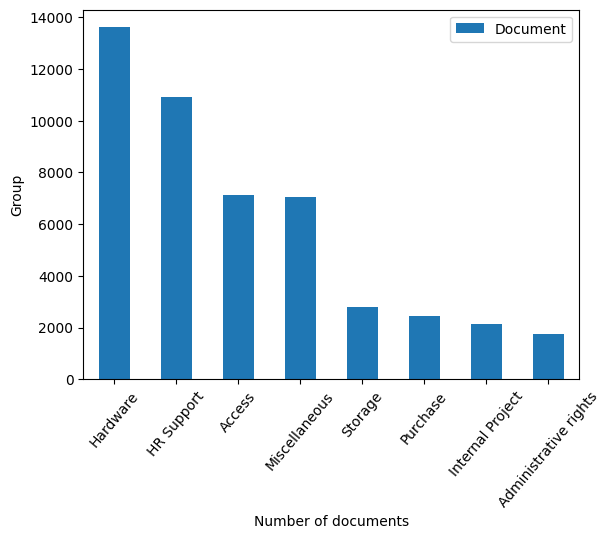

In [7]:
plt.figure(figsize=(15, 10))
ticket_distribution.sort_values(by="Document", ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Number of documents")
plt.ylabel("Group")
plt.show()

In [8]:
access = data[data.Topic_group == "Access"]["Document"]
text = access.values
wordcloud_access = WordCloud().generate(str(text))

adm_rights = data[data.Topic_group == "Administrative rights"]["Document"]
text = adm_rights.values
wordcloud_adm_rights = WordCloud().generate(str(text))

hr_support = data[data.Topic_group == "HR Support"]["Document"]
text = hr_support.values
wordcloud_hr_support = WordCloud().generate(str(text))

hardware = data[data.Topic_group == "Hardware"]["Document"]
text = hardware.values
wordcloud_hardware = WordCloud().generate(str(text))

internal_project = data[data.Topic_group == "Internal Project"]["Document"]
text = internal_project.values
wordcloud_internal_project = WordCloud().generate(str(text))

miscellaneous = data[data.Topic_group == "Miscellaneous"]["Document"]
text = miscellaneous.values
wordcloud_miscellaneous = WordCloud().generate(str(text))

purchase = data[data.Topic_group == "Purchase"]["Document"]
text = purchase.values
wordcloud_purchase = WordCloud().generate(str(text))

storage = data[data.Topic_group == "Storage"]["Document"]
text = storage.values
wordcloud_storage = WordCloud().generate(str(text))

##### It can be noticed that some keywords can have a higher relevance for some tickets

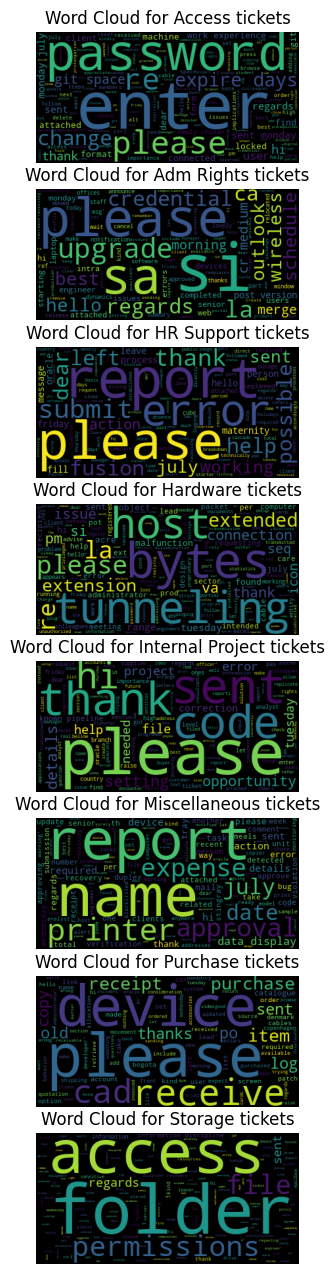

In [9]:
fig, axes = plt.subplots(8, 1, figsize=(16, 16))
axes[0].imshow(wordcloud_access)
axes[0].set_title("Word Cloud for Access tickets")
axes[1].imshow(wordcloud_adm_rights)
axes[1].set_title("Word Cloud for Adm Rights tickets")
axes[2].imshow(wordcloud_hr_support)
axes[2].set_title("Word Cloud for HR Support tickets")
axes[3].imshow(wordcloud_hardware)
axes[3].set_title("Word Cloud for Hardware tickets")
axes[4].imshow(wordcloud_internal_project)
axes[4].set_title("Word Cloud for Internal Project tickets")
axes[5].imshow(wordcloud_miscellaneous)
axes[5].set_title("Word Cloud for Miscellaneous tickets")
axes[6].imshow(wordcloud_purchase)
axes[6].set_title("Word Cloud for Purchase tickets")
axes[7].imshow(wordcloud_storage)
axes[7].set_title("Word Cloud for Storage tickets")

for ax in axes:
    ax.set_axis_off()
plt.show()